In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib  # For saving the model

# Sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the preocessed dataset
df = pd.read_csv('../data/processed/asteroids_cleaned.csv')

print("Data loaded successfully:")
print(df.head())

Data loaded successfully:
   pha      H       e      a      q      i    moid
0    0  10.38  0.2228  1.458  1.133  10.83  0.1480
1    0  15.59  0.5466  2.637  1.195  11.57  0.2010
2    0  13.81  0.5712  2.474  1.061   9.40  0.0797
3    0   9.18  0.5332  2.665  1.244  26.68  0.3430
4    0  17.37  0.4346  1.920  1.085  11.87  0.1080


In [2]:
# X = All columns EXCEPT our target 'pha'
X = df.drop('pha', axis=1)

# y = ONLY the target column 'pha'
y = df['pha']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

Features (X) shape: (39719, 6)
Target (y) shape: (39719,)


In [3]:
# splitting the data: 80% for training, 20% for testing
# random_state=42 ensures to get the same split every time (reproducibility)
# stratify=y ensures that 80/20 split maintains the class imbalance

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

print(f"Training set size: {len(y_train)} ({np.bincount(y_train)[1]} PHAs)")
print(f"Test set size: {len(y_test)} ({np.bincount(y_test)[1]} PHAs)")

Training set size: 31775 (2011 PHAs)
Test set size: 7944 (503 PHAs)


In [4]:
print("Training the Random Forest model...")

# n_estimators=100 means it will build 100 "decision trees"
# class_weight='balanced' for imbalanced dataset
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1  # Use all available CPU cores
)

# Train the model on the training data
rf_model.fit(X_train, y_train)

print("Model training complete.")

Training the Random Forest model...
Model training complete.


In [5]:
# Make predictions on the unseen test data
y_pred = rf_model.predict(X_test)

print("Model Performance on Test Set:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\n" + "="*30 + "\n")

# Display the full classification report
print(classification_report(y_test, y_pred, target_names=['Non-PHA (0)', 'PHA (1)']))

Model Performance on Test Set:
Accuracy: 0.9986


              precision    recall  f1-score   support

 Non-PHA (0)       1.00      1.00      1.00      7441
     PHA (1)       0.99      0.99      0.99       503

    accuracy                           1.00      7944
   macro avg       0.99      0.99      0.99      7944
weighted avg       1.00      1.00      1.00      7944



Generating confusion matrix...
[Plot saved to results/figures/04_confusion_matrix.png]


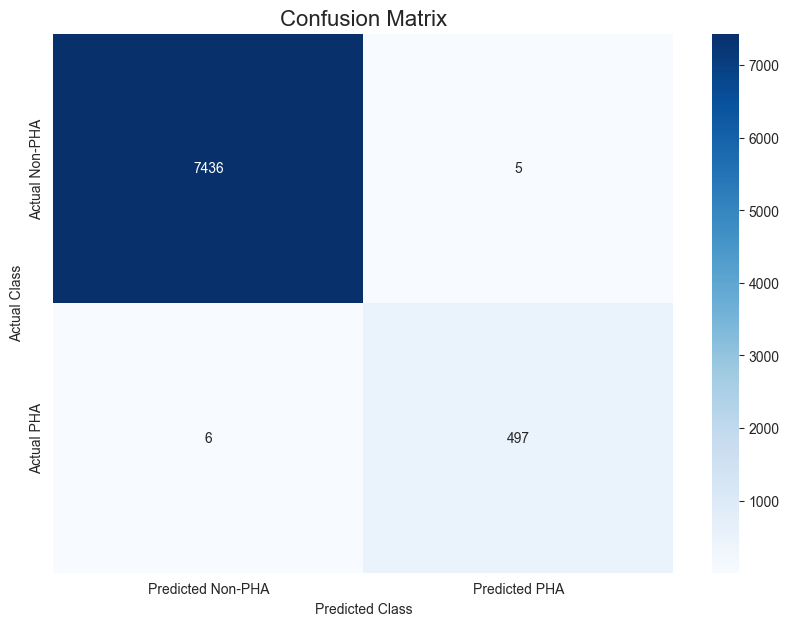

In [6]:
print("Generating confusion matrix...")

# Generate the matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it
plt.figure(figsize=(10, 7))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=['Predicted Non-PHA', 'Predicted PHA'],
            yticklabels=['Actual Non-PHA', 'Actual PHA'])
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

plt.savefig('../results/figures/04_confusion_matrix.png')
print("[Plot saved to results/figures/04_confusion_matrix.png]")